<a href="https://colab.research.google.com/github/winterForestStump/econometrics/blob/main/assignment_2/metrics_PS2_Problem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#(a)

Read the csv file. Split into 1000 samples with 100 observations, discard the rest

In [28]:
data = pd.read_csv('https://raw.githubusercontent.com/winterForestStump/econometrics/refs/heads/main/assignment_2/data.csv', sep = ',', header=0)

In [29]:
samples_number = list(range(1,1001))
samples = []
start = 0
for number in samples_number:
  stop = number * 100
  sample = data[start:stop]
  samples.append(sample)
  start = stop

total_length = len(samples)
print(f'Total number of samples: {total_length}')

# add a new column with 1s as constants to the samples for future calculations
for i in range(total_length):
  samples[i].insert(1, 'const', 1)

Total number of samples: 1000


#(b)

Obtain the parameter estimates by estimating with OLS the equation yi = β1 + β2 * x2 + β3 * x3 + εi. Compute R2 for each sample. Show the range of these estimates (min, max)

In [30]:
beta_hats = [] # collect beta_hats over the samples
residuals = [] # collect residuals over the samples
sigma2s_hat = [] # collect sigma_squareds over the samples
R2s = [] # collect R^2 over the samples

for i in range(total_length):
  # OLS estimator formula: β_hat = (X'X)^(-1)X'y
  beta_hat = (np.linalg.inv(samples[i][['const','X.2','X.3']].T @ samples[i][['const','X.2','X.3']])) @ (samples[i][['const','X.2','X.3']].T @ samples[i]['y'])
  beta_hats.append(beta_hat)

  # Calculating the residuals
  residual = samples[i]['y'] - (beta_hat[0] + beta_hat[1] * samples[i]['X.2'] + beta_hat[2] * samples[i]['X.3'])
  residuals.append(residual)

  # Calculating sigma squared hat
  sigma_squared_hat = (residual.T @ residual) / (len(samples[i]) - samples[i][['const','X.2','X.3']].shape[1])
  sigma2s_hat.append(sigma_squared_hat)


  # Coefficient of determination
  r_squared = 1 - (residual.T @ residual) / (sum((samples[i]['y'] - samples[i]['y'].mean())**2))
  R2s.append(r_squared)

# Show the range of the parameters
β1_hat_min = round(min([beta_hats[i][0] for i in range(len(beta_hats))]),2)
β1_hat_max = round(max([beta_hats[i][0] for i in range(len(beta_hats))]),2)

β2_hat_min = round(min([beta_hats[i][1] for i in range(len(beta_hats))]),2)
β2_hat_max = round(max([beta_hats[i][1] for i in range(len(beta_hats))]),2)

β3_hat_min = round(min([beta_hats[i][2] for i in range(len(beta_hats))]),2)
β3_hat_max = round(max([beta_hats[i][2] for i in range(len(beta_hats))]),2)

sigma2_hat_min = round(min(sigma2s_hat),2)
sigma2_hat_max = round(max(sigma2s_hat),2)

R2_min = round(min(R2s),2)
R2_max = round(max(R2s),2)

print(f'The range of β1_hat is: min {β1_hat_min} - max {β1_hat_max}.')
print(f'The range of β2_hat is: min {β2_hat_min} - max {β2_hat_max}.')
print(f'The range of β3_hat is: min {β3_hat_min} - max {β3_hat_max}.')
print(f'The range of σ_ε²_hat is: min {sigma2_hat_min} - max {sigma2_hat_max}')
print(f'The range of R2 is: min {R2_min} - max {R2_max}')

The range of β1_hat is: min 9.83 - max 10.4.
The range of β2_hat is: min 0.23 - max 0.47.
The range of β3_hat is: min 0.4 - max 0.66.
The range of σ_ε²_hat is: min 0.57 - max 1.45
The range of R2 is: min 0.59 - max 0.86


# (c)

Compute the means of the parameter estimates, and compare them with the true values. Why are they similar/different?

In [31]:
true_betas = [10, 0.4, 0.6]
true_sigma_sq = 1

beta_1_hat_mean = round(np.average([beta_hats[i][0] for i in range(len(beta_hats))]),2)
beta_2_hat_mean = round(np.average([beta_hats[i][1] for i in range(len(beta_hats))]),2)
beta_3_hat_mean = round(np.average([beta_hats[i][2] for i in range(len(beta_hats))]),2)
sigma2_hat_mean = round(np.average(sigma2s_hat),2)


print(f'The average of β1_hat is: {beta_1_hat_mean}. The true β1 is {true_betas[0]}.')
print(f'The average of β2_hat is: {beta_2_hat_mean}. The true β2 is {true_betas[1]}.')
print(f'The average of β3_hat is: {beta_3_hat_mean}. The true β3 is {true_betas[2]}.')
print(f'The average of σ_ε²_hat is: {sigma2_hat_mean}. The true σ_ε² is {true_sigma_sq}.')

The average of β1_hat is: 10.14. The true β1 is 10.
The average of β2_hat is: 0.35. The true β2 is 0.4.
The average of β3_hat is: 0.52. The true β3 is 0.6.
The average of σ_ε²_hat is: 0.93. The true σ_ε² is 1.


In [32]:
data[data['y'].duplicated()]['y'].unique()

array([7.5])

In [33]:
data['y'].min()

7.5

The mean estimates, $\bar{\hat{\beta}} \approx [10.14, 0.35, 0.52]$, are different from the true parameters ${\beta = [10, 0.4, 0.6]}$ most likely because the asymptotic normality is violated and the OLS estimator is biased and inconsistent.

Based on that the dependent variable $y$ is clipped at $7.5$ ($\min(y)=7.5$), the standard properties of the OLS estimator (unbiasedness and consistency) do not hold for the underlying model. The fundamental OLS assumption $E[\epsilon|X] = 0$ is violated, causing the OLS estimator to be biased and inconsistent for the true parameters $\beta$.

# (d)

Plot a histogram (you can choose an appropriate bin size) of the four parameter estimates. What do you observe?

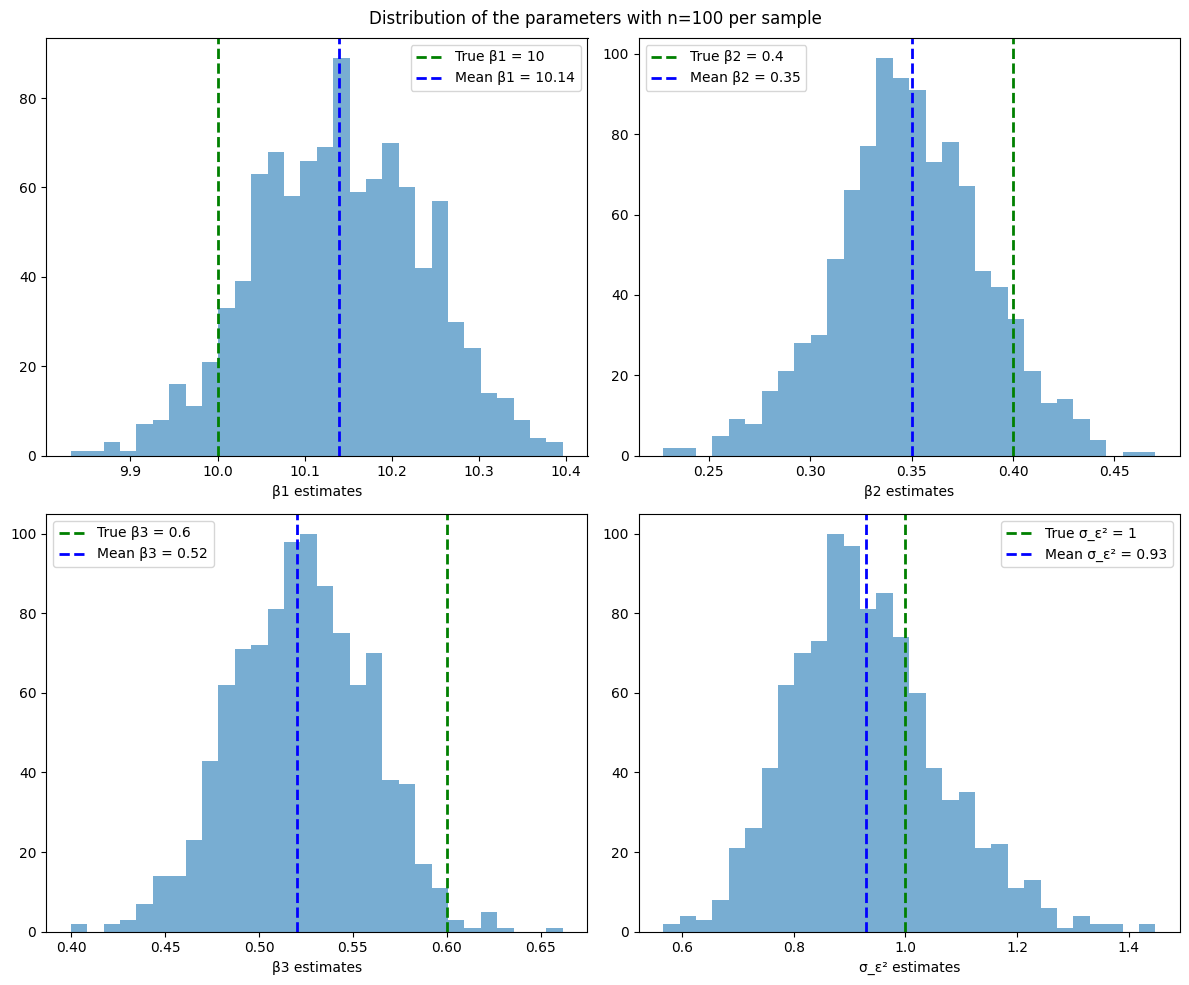

In [34]:
# Plot histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of the parameters with n=100 per sample')

# β1 histogram
axes[0,0].hist([beta_hats[i][0] for i in range(len(beta_hats))], bins=30, alpha=0.6)
axes[0,0].axvline(true_betas[0], color='green', linestyle='--', linewidth=2, label=f'True β1 = {true_betas[0]}')
axes[0,0].axvline(beta_1_hat_mean, color='blue', linestyle='--', linewidth=2, label=f'Mean β1 = {beta_1_hat_mean:.2f}')
axes[0,0].set_xlabel('β1 estimates')
axes[0,0].legend()

# β2 histogram
axes[0,1].hist([beta_hats[i][1] for i in range(len(beta_hats))], bins=30, alpha=0.6)
axes[0,1].axvline(true_betas[1], color='green', linestyle='--', linewidth=2, label=f'True β2 = {true_betas[1]}')
axes[0,1].axvline(beta_2_hat_mean, color='blue', linestyle='--', linewidth=2, label=f'Mean β2 = {beta_2_hat_mean:.2f}')
axes[0,1].set_xlabel('β2 estimates')
axes[0,1].legend()

# β3 histogram
axes[1,0].hist([beta_hats[i][2] for i in range(len(beta_hats))], bins=30, alpha=0.6)
axes[1,0].axvline(true_betas[2], color='green', linestyle='--', linewidth=2, label=f'True β3 = {true_betas[2]}')
axes[1,0].axvline(beta_3_hat_mean, color='blue', linestyle='--', linewidth=2, label=f'Mean β3 = {beta_3_hat_mean:.2f}')
axes[1,0].set_xlabel('β3 estimates')
axes[1,0].legend()

# σ_ε² histogram
axes[1,1].hist(sigma2s_hat, bins=30, alpha=0.6)
axes[1,1].axvline(true_sigma_sq, color='green', linestyle='--', linewidth=2, label=f'True σ_ε² = {true_sigma_sq}')
axes[1,1].axvline(sigma2_hat_mean, color='blue', linestyle='--', linewidth=2, label=f'Mean σ_ε² = {sigma2_hat_mean:.2f}')
axes[1,1].set_xlabel('σ_ε² estimates')
axes[1,1].legend()

plt.tight_layout()
plt.show()

The histograms are centered around the biased limit of the OLS estimator $\beta \approx [10.15, 0.35, 0.52]$, not the true parameter ${\beta = [10, 0.4, 0.6]}$.

The center of the distribution is the OLS estimator's expected value under the sampling conditions, which is the inconsistent (biased) limit $\beta$.

# (e)

Increase the number of observations n in each sample to 1000, hence using
all observations in data.csv. Obtain the parameter estimates for each sample. Compute the means.

In [35]:
samples_number = list(range(1,1001))
samples = []
start = 0
for number in samples_number:
  stop = number * 1000 # increase number of observation in each sample to 1000
  sample = data[start:stop]
  samples.append(sample)
  start = stop

total_length = len(samples)
print(f'Total number of samples: {total_length}')

# add a new column with 1s as constants to the samples for future calculations
for i in range(total_length):
  samples[i].insert(1, 'const', 1)

Total number of samples: 1000


In [36]:
beta_hats = [] # collect beta_hats over the samples
residuals = [] # collect residuals over the samples
sigma2s_hat = [] # collect sigma_squareds over the samples
R2s = [] # collect R^2 over the samples

for i in range(total_length):
  # OLS estimator formula: β_hat = (X'X)^(-1)X'y
  beta_hat = (np.linalg.inv(samples[i][['const','X.2','X.3']].T @ samples[i][['const','X.2','X.3']])) @ (samples[i][['const','X.2','X.3']].T @ samples[i]['y'])
  beta_hats.append(beta_hat)

  # Calculating the residuals
  residual = samples[i]['y'] - (beta_hat[0] + beta_hat[1] * samples[i]['X.2'] + beta_hat[2] * samples[i]['X.3'])
  residuals.append(residual)

  # Calculating sigma squared hat
  sigma_squared_hat = (residual.T @ residual) / (len(samples[i]) - samples[i][['const','X.2','X.3']].shape[1])
  sigma2s_hat.append(sigma_squared_hat)


  # Coefficient of determination
  r_squared = 1 - (residual.T @ residual) / (sum((samples[i]['y'] - samples[i]['y'].mean())**2))
  R2s.append(r_squared)

# Show the range of the parameters
β1_hat_min = round(min([beta_hats[i][0] for i in range(len(beta_hats))]),2)
β1_hat_max = round(max([beta_hats[i][0] for i in range(len(beta_hats))]),2)

β2_hat_min = round(min([beta_hats[i][1] for i in range(len(beta_hats))]),2)
β2_hat_max = round(max([beta_hats[i][1] for i in range(len(beta_hats))]),2)

β3_hat_min = round(min([beta_hats[i][2] for i in range(len(beta_hats))]),2)
β3_hat_max = round(max([beta_hats[i][2] for i in range(len(beta_hats))]),2)

sigma2_hat_min = round(min(sigma2s_hat),2)
sigma2_hat_max = round(max(sigma2s_hat),2)

R2_min = round(min(R2s),2)
R2_max = round(max(R2s),2)

print(f'The range of β1_hat is: min {β1_hat_min} - max {β1_hat_max}.')
print(f'The range of β2_hat is: min {β2_hat_min} - max {β2_hat_max}.')
print(f'The range of β3_hat is: min {β3_hat_min} - max {β3_hat_max}.')
print(f'The range of σ_ε²_hat is: min {sigma2_hat_min} - max {sigma2_hat_max}')
print(f'The range of R2 is: min {R2_min} - max {R2_max}')

The range of β1_hat is: min 10.06 - max 10.24.
The range of β2_hat is: min 0.31 - max 0.39.
The range of β3_hat is: min 0.48 - max 0.56.
The range of σ_ε²_hat is: min 0.83 - max 1.07
The range of R2 is: min 0.72 - max 0.8


In [37]:
true_betas = [10, 0.4, 0.6]
true_sigma_sq = 1

beta_1_hat_mean = round(np.average([beta_hats[i][0] for i in range(len(beta_hats))]),2)
beta_2_hat_mean = round(np.average([beta_hats[i][1] for i in range(len(beta_hats))]),2)
beta_3_hat_mean = round(np.average([beta_hats[i][2] for i in range(len(beta_hats))]),2)
sigma2_hat_mean = round(np.average(sigma2s_hat),2)


print(f'The average of β1_hat is: {beta_1_hat_mean}. The true β1 is {true_betas[0]}.')
print(f'The average of β2_hat is: {beta_2_hat_mean}. The true β2 is {true_betas[1]}.')
print(f'The average of β3_hat is: {beta_3_hat_mean}. The true β3 is {true_betas[2]}.')
print(f'The average of σ_ε²_hat is: {sigma2_hat_mean}. The true σ_ε² is {true_sigma_sq}.')

The average of β1_hat is: 10.15. The true β1 is 10.
The average of β2_hat is: 0.35. The true β2 is 0.4.
The average of β3_hat is: 0.52. The true β3 is 0.6.
The average of σ_ε²_hat is: 0.93. The true σ_ε² is 1.


We observe the standard errors decreasing (the histogram tightens).

This change is consistent with the Law of Large Numbers (LLN).

However, the estimator is inconsistent for the true parameters, meaning $\hat{\beta}_{\text{OLS}} \nrightarrow \beta^*$ as $n \to \infty$.

The estimator is consistent for its own limit, ${\beta_{\text{actual}}}$, meaning $\hat{\beta}_{\text{OLS}} \to \beta_{\text{actual}}$.

Increasing $n$ makes the estimates more precisely wrong. The variance shrinks, but the estimator remains locked onto the biased limit of $[10.15, 0.35, 0.52]$, forever missing the true values of $[10, 0.4, 0.6]$.

# (f)

Plot a histogram (you can choose an appropriate bin size) of the four parameter
estimates in βˆ and ˆσ2

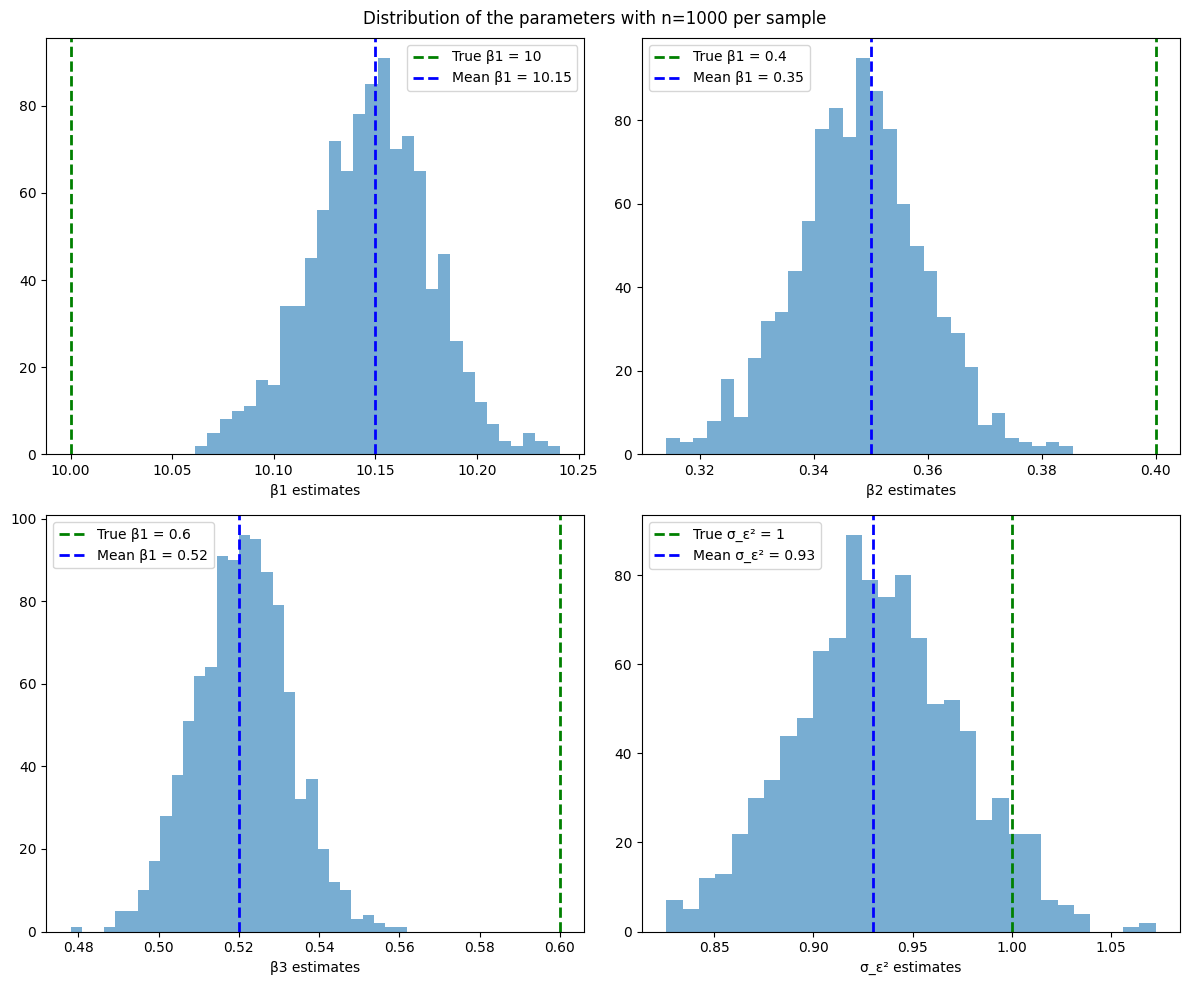

In [38]:
# Plot histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of the parameters with n=1000 per sample')

# β1
axes[0,0].hist([beta_hats[i][0] for i in range(len(beta_hats))], bins=30, alpha=0.6)
axes[0,0].axvline(true_betas[0], color='green', linestyle='--', linewidth=2, label=f'True β1 = {true_betas[0]}')
axes[0,0].axvline(beta_1_hat_mean, color='blue', linestyle='--', linewidth=2, label=f'Mean β1 = {beta_1_hat_mean:.2f}')
axes[0,0].set_xlabel('β1 estimates')
axes[0,0].legend()

# β2
axes[0,1].hist([beta_hats[i][1] for i in range(len(beta_hats))], bins=30, alpha=0.6)
axes[0,1].axvline(true_betas[1], color='green', linestyle='--', linewidth=2, label=f'True β1 = {true_betas[1]}')
axes[0,1].axvline(beta_2_hat_mean, color='blue', linestyle='--', linewidth=2, label=f'Mean β1 = {beta_2_hat_mean:.2f}')
axes[0,1].set_xlabel('β2 estimates')
axes[0,1].legend()

# β3
axes[1,0].hist([beta_hats[i][2] for i in range(len(beta_hats))], bins=30, alpha=0.6)
axes[1,0].axvline(true_betas[2], color='green', linestyle='--', linewidth=2, label=f'True β1 = {true_betas[2]}')
axes[1,0].axvline(beta_3_hat_mean, color='blue', linestyle='--', linewidth=2, label=f'Mean β1 = {beta_3_hat_mean:.2f}')
axes[1,0].set_xlabel('β3 estimates')
axes[1,0].legend()

# σ_ε²
axes[1,1].hist(sigma2s_hat, bins=30, alpha=0.6)
axes[1,1].axvline(true_sigma_sq, color='green', linestyle='--', linewidth=2, label=f'True σ_ε² = {true_sigma_sq}')
axes[1,1].axvline(sigma2_hat_mean, color='blue', linestyle='--', linewidth=2, label=f'Mean σ_ε² = {sigma2_hat_mean:.2f}')
axes[1,1].set_xlabel('σ_ε² estimates')
axes[1,1].legend()

plt.tight_layout()
plt.show()

The histograms for all three parameters are still bell-shaped (normally distributed). This is a clear demonstration of the Central Limit Theorem, which applies even when the estimator is biased.

The centers of the histograms are located at the biased limit of the OLS estimator (${\beta \approx [10.15, 0.35, 0.52]}$), not the true parameters (${\beta =[10, 0.4, 0.6]}$). The estimator is precisely estimating a wrong value because it is the wrong estimator (OLS).

Compared to the plots from the smaller $n$ ($n=100$), the histograms for $n=1000$ are tighter (less dispersed). According to the LLN the standard error (the width of the histogram) is proportional to $1/\sqrt{n}$. By increasing $n$ by a factor of 10 (from 100 to 1000), the standard error decreases by a factor of $\sqrt{10}$ $\approx$ 3,16. The estimates become much more precise. This confirms that OLS is consistent for its own biased limit; as $n$ increases, the estimates tightly cluster around $[10.15, 0.35, 0.52]$, demonstrating convergence.

This plots visually confirm that no matter how much data you use, the OLS estimates will remain biased away from the true parameters due to the censoring at $y=7.5$.

# (g)

Plot a histogram (you can choose an appropriate bin size) of √
n(
ˆβk − βk) with
k = 1, 2, 3 and √
n(ˆσε
2 − σε
2
).

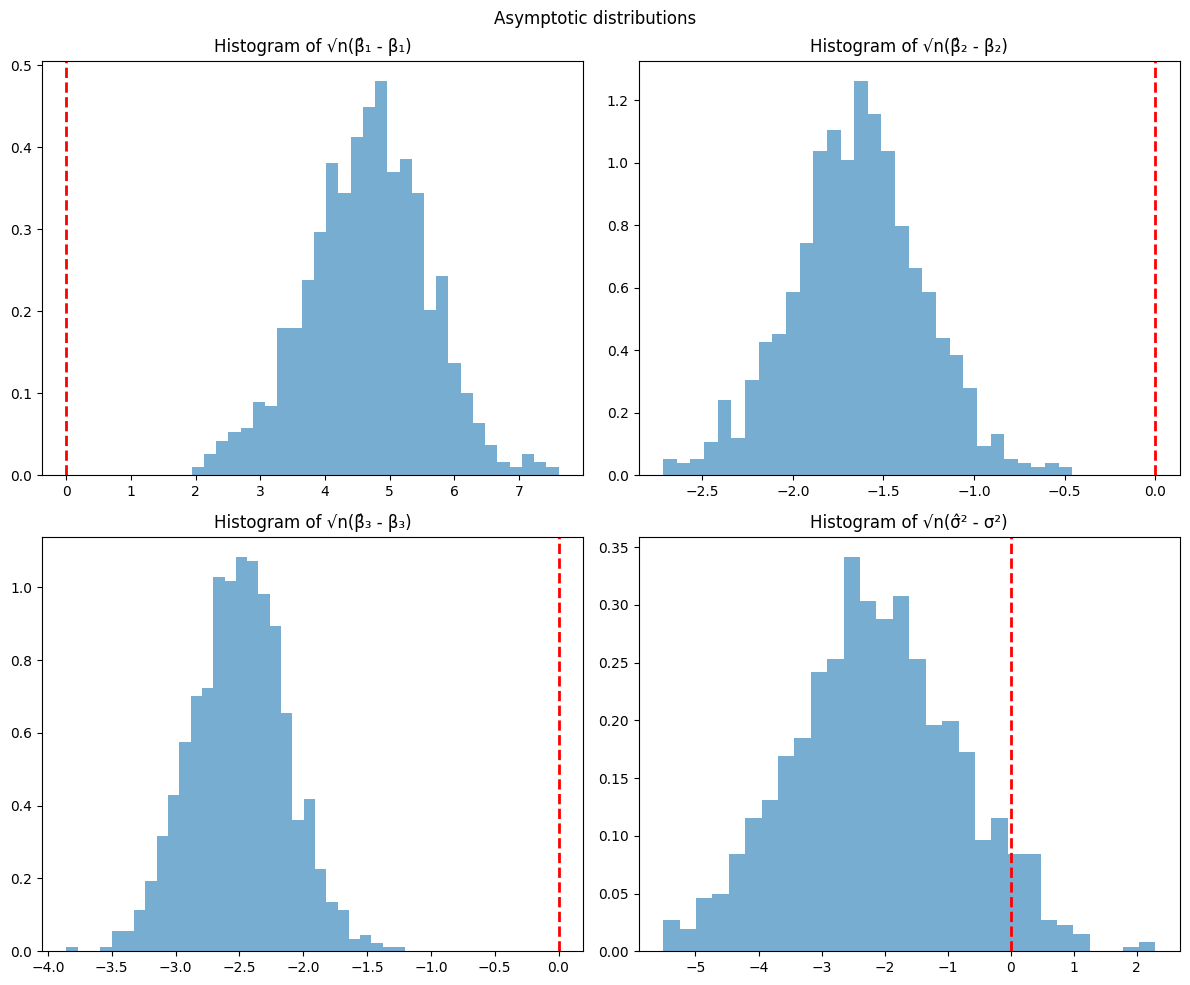

In [39]:
true_betas = [10, 0.4, 0.6]
true_sigma_sq = 1
n = 1000

scaled_beta1 = [np.sqrt(n) * (beta_hats[i][0] - true_betas[0]) for i in range(len(beta_hats))]
scaled_beta2 = [np.sqrt(n) * (beta_hats[i][1] - true_betas[1]) for i in range(len(beta_hats))]
scaled_beta3 = [np.sqrt(n) * (beta_hats[i][2] - true_betas[2]) for i in range(len(beta_hats))]
scaled_sigma2 = [np.sqrt(n) * (sigma2s_hat[i] - true_sigma_sq) for i in range(len(sigma2s_hat))]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Asymptotic distributions')

# β1
axes[0,0].hist(scaled_beta1, bins=30, density=True, alpha=0.6)
axes[0,0].axvline(0, color='red', linestyle='--', linewidth=2, label=f'0')
axes[0,0].set_title('Histogram of √n(β̂₁ - β₁)')

# β2
axes[0,1].hist(scaled_beta2, bins=30, density=True, alpha=0.6)
axes[0,1].axvline(0, color='red', linestyle='--', linewidth=2, label=f'0')
axes[0,1].set_title('Histogram of √n(β̂₂ - β₂)')

# β3
axes[1,0].hist(scaled_beta3, bins=30, density=True, alpha=0.6)
axes[1,0].axvline(0, color='red', linestyle='--', linewidth=2, label=f'0')
axes[1,0].set_title('Histogram of √n(β̂₃ - β₃)')

# σ_ε²
axes[1,1].hist(scaled_sigma2, bins=30, density=True, alpha=0.6)
axes[1,1].axvline(0, color='red', linestyle='--', linewidth=2, label=f'0')
axes[1,1].set_title('Histogram of √n(σ̂² - σ²)')

plt.tight_layout()
plt.show()

The distribution resembles a normal distribution, confirming the general validity of the Central Limit Theorem, but the centering is incorrect: the distribution is NOT centered at 0, it is centered at the bias.

The $\sqrt{n}$ plot correctly shows that the estimates behave like a Normal distribution, but the center of that distribution is biased away from the true parameters because the OLS estimator is not appropriate for analyzing censored data.